In [5]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [6]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [7]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

## Read Data: SP500

In [8]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [9]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

In [15]:
query = '''
select * from SP500
'''

data = pd.read_sql(query, conn)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469,1478,1438,1455,1455,931800000
1,2000-01-04,1455,1455,1397,1399,1399,1009000000
2,2000-01-05,1399,1413,1378,1402,1402,1085500000
3,2000-01-06,1402,1412,1392,1403,1403,1092300000
4,2000-01-07,1403,1441,1401,1441,1441,1225200000


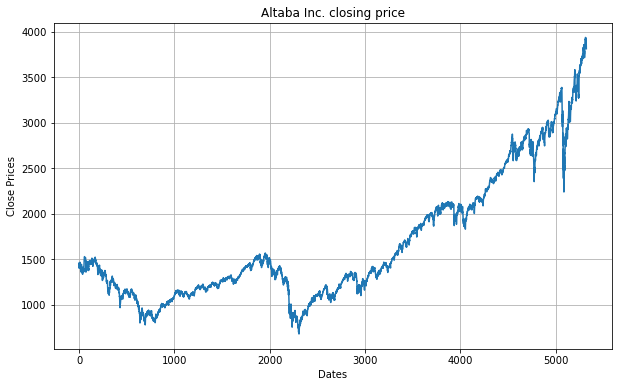

In [16]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

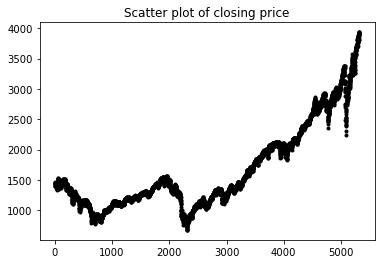

In [17]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

## check for stationarity

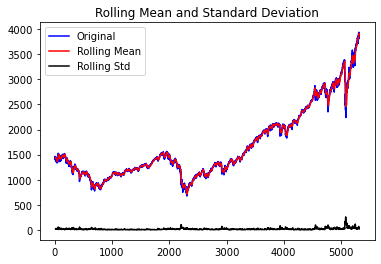

Results of dickey fuller test


NameError: name 'adfuller' is not defined

In [18]:
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
test_stationarity(df_close)

In [19]:
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

NameError: name 'seasonal_decompose' is not defined

No handles with labels found to put in legend.


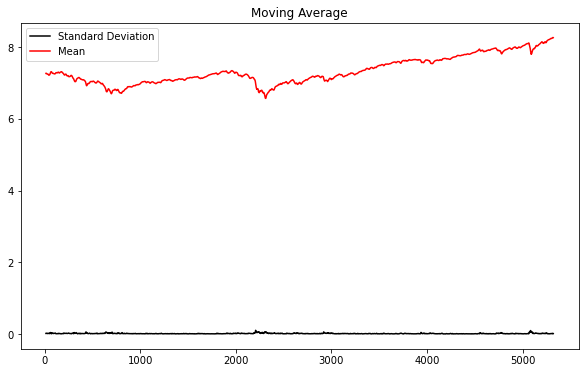

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

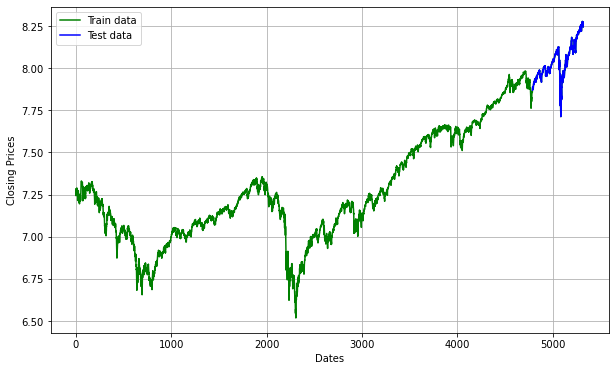

In [22]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [24]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())

NameError: name 'auto_arima' is not defined

In [25]:
# Forecast
fc, se, conf = fitted.forecast(544, alpha=0.05)  # 95% confidence
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Altaba Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

NameError: name 'fitted' is not defined